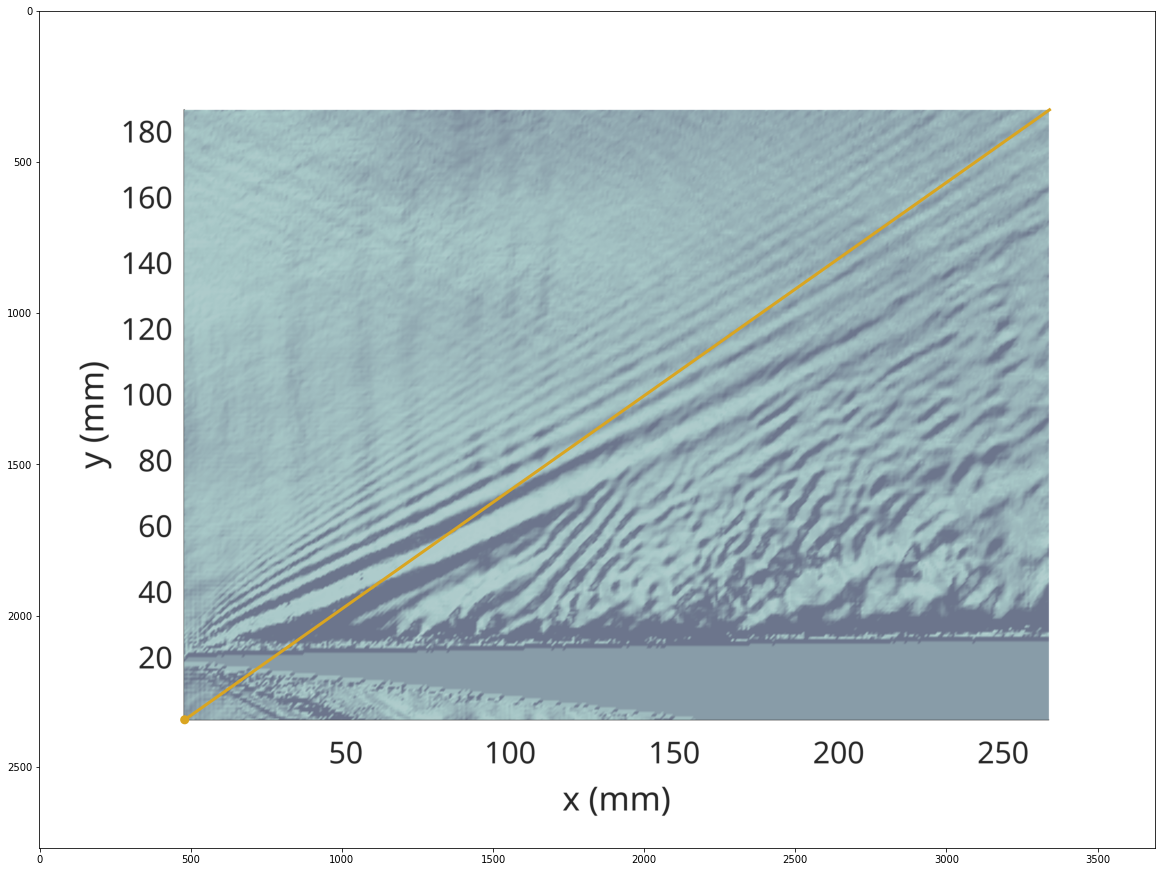

In [39]:
# Bottom left of interesting area: x,y = (480, 2345)
# Top right of interesting area: x,y = (3341, 327)

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.lines as lines
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots(figsize=(20,16))
img = mpimg.imread('./trial 2/fsss/t2_10.png')

ax.add_artist(lines.Line2D([480, 3341], [2345, 327], linewidth=3, color="goldenrod"))
ax.add_artist(patches.Circle((480, 2345), radius = 10, color = "goldenrod", linewidth = 3))

imgplot = plt.imshow(img)

In [84]:
def add_to_plot(fig, ax, img, x, y, color_str):
    # Convert data in millimeters to pixels
    x = list(map(lambda x: x*xp/xmm + bl[0], x))
    y = list(map(lambda x: bl[1] - x*yp/ymm, y))

    # Plot data points directly as circles
    for i in range(0,len(x)):
        ax.add_artist(patches.Circle((x[i],y[i]), radius = 10, color = color_str, linewidth = 3))

    # Get the line of best fit
    coeffs = np.polyfit(x, y, 1)
    lin = lambda x: x*coeffs[0] + coeffs[1]

    # Get the two points we'll use to plot the line of best fit

    # Initial guess of the points
    p1 = (480, lin(480))
    p2 = (3341, lin(3341))

    # Modify the points so the line is contained within the figure
    if p1[1] > bl[1]:
        a = np.array([[-1*coeffs[0],1],[0,1]])
        b = np.array([coeffs[1],bl[1]])
        s = np.linalg.solve(a,b)
        p2 = (s[0], s[1])

    if p1[1] < tr[1]:
        a = np.array([[-1*coeffs[0],1],[0,1]])
        b = np.array([coeffs[1],tr[1]])
        s = np.linalg.solve(a,b)
        p2 = (s[0], s[1])

    if p2[1] > bl[1]:
        a = np.array([[-1*coeffs[0],1],[0,1]])
        b = np.array([coeffs[1],bl[1]])
        s = np.linalg.solve(a,b)
        p2 = (s[0], s[1])

    if p2[1] < tr[1]:
        a = np.array([[-1*coeffs[0],1],[0,1]])
        b = np.array([coeffs[1],tr[1]])
        s = np.linalg.solve(a,b)
        p2 = (s[0], s[1])

    # Convert our two points to the format expected
    x = [p1[0], p2[0]]
    y = [p1[1], p2[1]]

    # Plot the line of best fit
    ax.add_artist(lines.Line2D(x, y, linewidth=3, color=color_str))
    return fig, ax, img

In [151]:
def get_seconds_line_numbers(trial, seconds):
    # Open file
    file = open("./trial " + str(trial) + "/raw_data",'r')
    lines = file.readlines()
    
    # Initialize output array, last value is the last line of the file
    arr = [-1,-1,-1,-1,-1,-1,len(lines)-1]
    
    for i in range(0,len(lines)):
        if lines[i].strip() == "10 seconds":
            arr[0] = i;
        elif lines[i].strip() == "11 seconds":
            arr[1] = i;
        elif lines[i].strip() == "12 seconds":
            arr[2] = i;
        elif lines[i].strip() == "13 seconds":
            arr[3] = i;
        elif lines[i].strip() == "14 seconds":
            arr[4] = i;
        elif lines[i].strip() == "15 seconds":
            arr[5] = i;

    file.close()
    
    return arr

def get_data(trial, seconds, field):
    # Output arrays
    x = []
    y = []
    
    # Open file
    file = open("./trial " + str(trial) + "/raw_data",'r')
    lines = file.readlines()
    
    # Get line numbers of each section
    sections = get_seconds_line_numbers(trial, seconds)
    print("HI",sections)

    section_line = 0;
    # Read each line in the file until we get to what we're interested in
    print(sections[int(seconds)-10],sections[int(seconds)-10+1])
    for i in range(sections[int(seconds)-10],sections[int(seconds)-10+1]):
        if lines[i].strip() == field:
            section_line = i
    
    print("section_line: " + str(section_line))
            
    # Extract data
    for i in range(section_line+1,len(lines)):
        if lines[i].strip() == "":
            break;
        arr = lines[i].strip().split(" ")
        print(arr)
        x.append(float(arr[0]))
        y.append(float(arr[1]))
        
    file.close()

    return x,y

HI [2, 35, 69, 100, 132, 164, 193]
2 35
section_line: 4
['2.1925', '21.5783', '1.91908']
['4.2695', '22.963', '2.14664']
['16.0395', '53.4266', '2.55101']
['22.963', '76.2742', '2.74828']


([2.1925, 4.2695, 16.0395, 22.963], [21.5783, 22.963, 53.4266, 76.2742])

HI [2, 35, 69, 100, 132, 164, 193]
2 35
section_line: 31
['241.747', '25.0401']
['29.1942', '20.886']


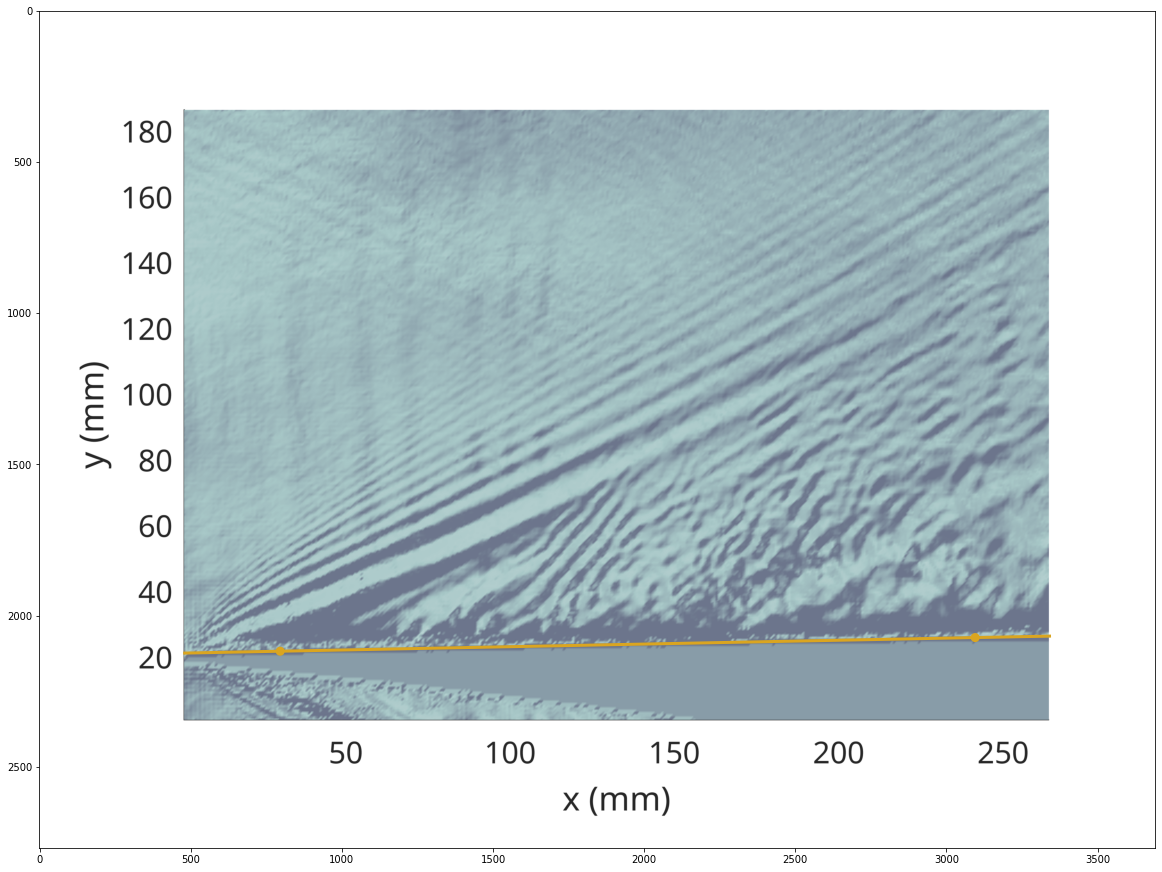

In [157]:
# Corners of the plot area in pixels
bl = (480, 2345)
tr = (3341, 327)

# Size of the plot area in millimeters (axes units)
xmm = 264.4788
ymm = 185.7814

# Size of the plot area in pixels
xp = np.abs(bl[0]-tr[0])
yp = np.abs(bl[1]-tr[1])

x,y = get_data("X", 10, "On wedge")

# Make figure which we will modify
fig, ax = plt.subplots(figsize=(20,16))
img = mpimg.imread('./trial 2/fsss/t2_10.png')
    
fig, ax, img = add_to_plot(fig, ax, img, x, y, "goldenrod")

# Show the image
imgplot = plt.imshow(img)